In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
data = pd.read_csv("./asm_data_for_ml.txt", sep='\t')

In [11]:
data.columns

Index(['MJD', 'orbit', 'rate', 'error', 'rateA', 'errorA', 'rateB', 'errorB',
       'rateC', 'errorC'],
      dtype='object')

In [2]:
def mask(cola, colb, color=None, p1=99.9, p2=99.9):
    mask = (cola < np.percentile(cola, p1)) & (colb < np.percentile(colb, p2))
    if color is None:
        return cola[mask], colb[mask], None
    else:
        return cola[mask], colb[mask], color[mask]

    

def myhexplot(cola, colb, p1=99.9, p2=99.9, ax=None):
    if ax is None:
        plt.figure()
        ax = plt.gca()
    cola, colb, _ = mask(cola, colb, p1=p1, p2=p2)
    ax.hexbin(cola, colb, cmap='viridis', bins='log')
    if hasattr(cola, "name"):
        ax.set_xlabel(cola.name)
        ax.set_ylabel(colb.name)

In [3]:
from matplotlib.widgets import Slider
from matplotlib.colors import ListedColormap

def timeline_plot(cola, colb, probabilities=None):
    cola = np.array(cola)
    colb = np.array(colb)
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    ax = axes[0]

    ax.hexbin(cola, colb, cmap='viridis', bins='log')
    if probabilities is not None:
        preds = np.argmax(probabilities, axis=1)
    else:
        preds = np.ones(len(cola))
    
    window = 100

    cm = ListedColormap(['r', 'g', 'b', 'c'])

    def setup_plot(cola, colb, c):
        dots = ax.scatter(cola, colb, c=c, alpha=1, s=20, cmap=cm)
        return dots

    l = setup_plot(cola[:5 * window], colb[:5 * window], c=preds[:5 * window])
    
    sfreq = Slider(axes[1], 'Start', 0, len(cola), valinit=0, facecolor=None, alpha=.1)
    if probabilities is not None:
        for prob, color in zip(probs.T, ['r', 'g', 'b', 'c']):
            axes[1].plot(pd.Series(prob).rolling(window=50).mean(), color=color, alpha=.6, linewidth=3)

    def update(val):
        start = int(sfreq.val)
        inds = range(start, start + window)
        l.set_offsets(np.c_[cola[inds], colb[inds]])
        l.set_array(preds[inds])
        #ax.canvas.draw_idle()
    sfreq.on_changed(update)

    ax.set_xlim(cola.min(), cola.max())
    ax.set_ylim(colb.min(), colb.max())
    plt.show()

In [4]:

x, y, _ = mask(data.rateC / data.rateA, data.rate, p1=99., p2=99.99)
X = np.c_[x, y]


<IPython.core.display.Javascript object>


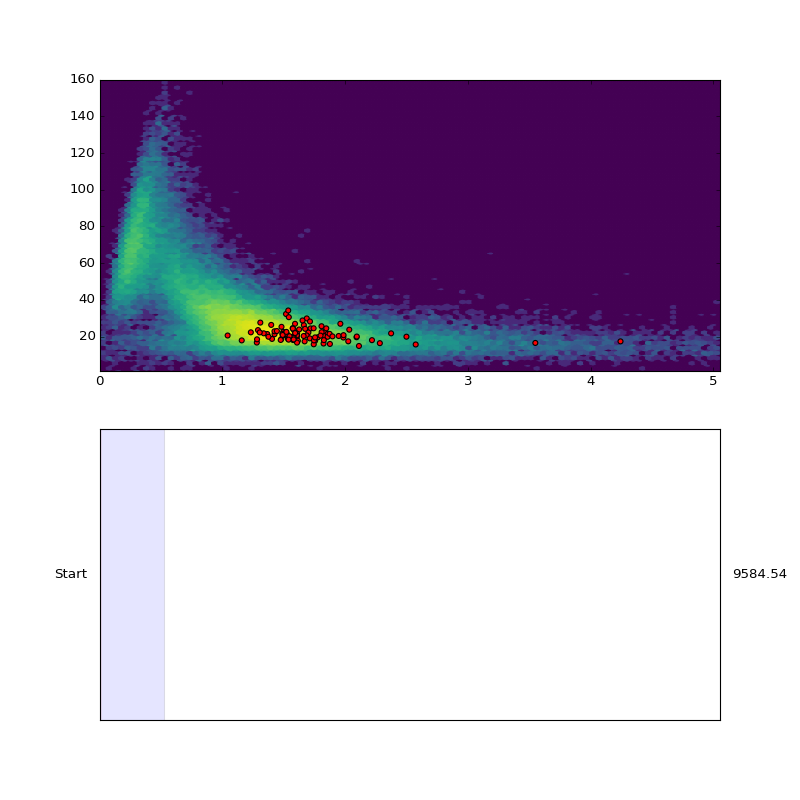

In [5]:
timeline_plot(X[:, 0], X[:, 1])

In [6]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, n_init=5).fit(X)
probs = gmm.predict_proba(X)

<IPython.core.display.Javascript object>


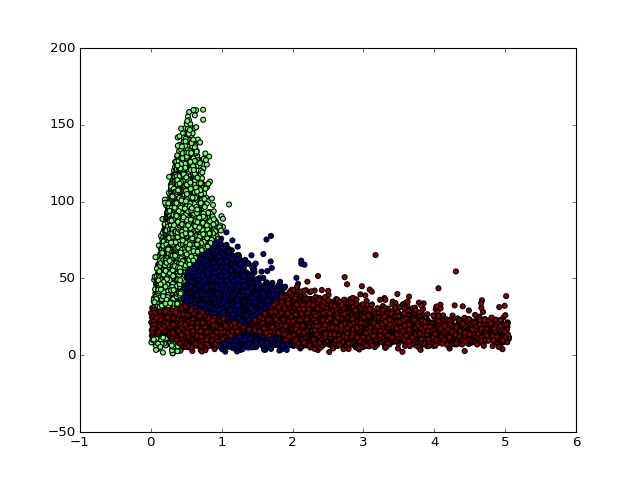

In [7]:
plt.figure()
plt.scatter(X[:,0], X[:, 1], c=np.argmax(probs, axis=1))

<IPython.core.display.Javascript object>


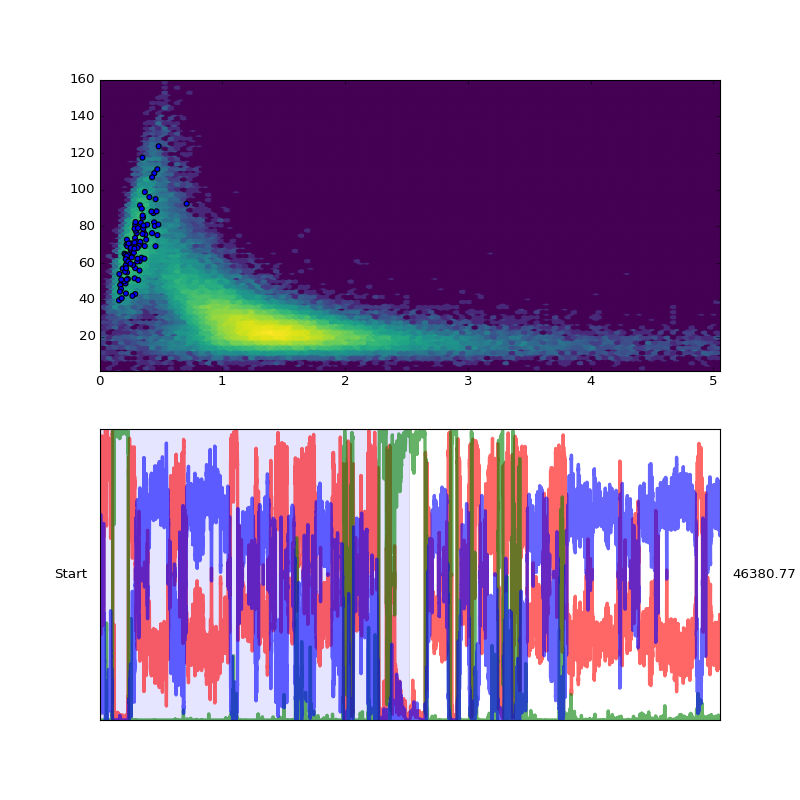

In [8]:
timeline_plot(X[:, 0], X[:, 1], probs)

<IPython.core.display.Javascript object>


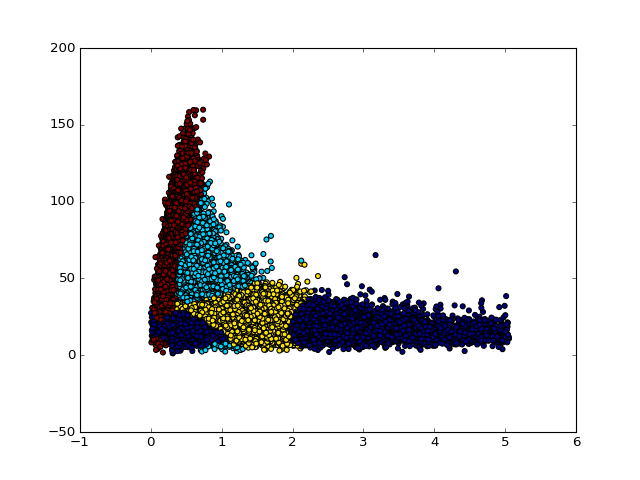

In [9]:
from sklearn.mixture import GaussianMixture
gmm4 = GaussianMixture(n_components=4, n_init=5).fit(X)
probs = gmm4.predict_proba(X)
plt.figure()
plt.scatter(X[:,0], X[:, 1], c=np.argmax(probs, axis=1))

<IPython.core.display.Javascript object>


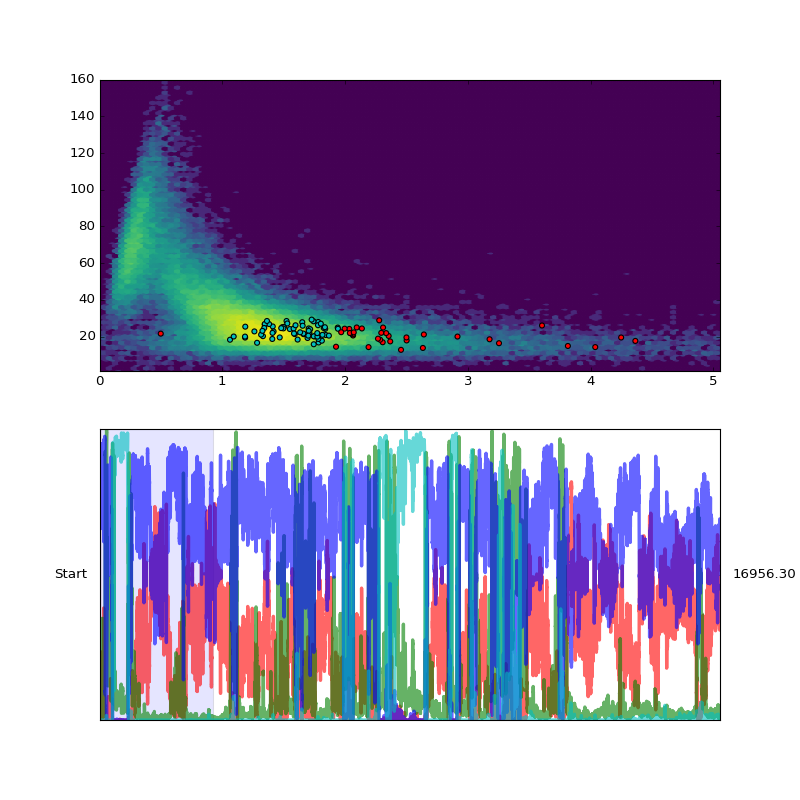

In [11]:
timeline_plot(X[:, 0], X[:, 1], probs)

<IPython.core.display.Javascript object>


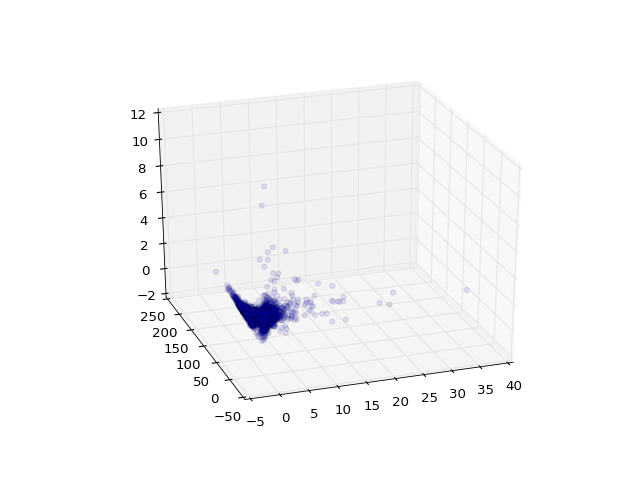

In [18]:
from mpl_toolkits.mplot3d import Axes3D
data = pd.read_csv("./asm_data_for_ml.txt", sep='\t')

threedee = plt.figure().gca(projection='3d')
bla = data[::20]
threedee.scatter(bla['rateC'] / bla['rateA'], bla['rate'], bla['rateC'] / bla['rateB'], alpha=.1)


In [16]:
threedee.set_xlim3d(0, 5)

(0, 5)

<IPython.core.display.Javascript object>


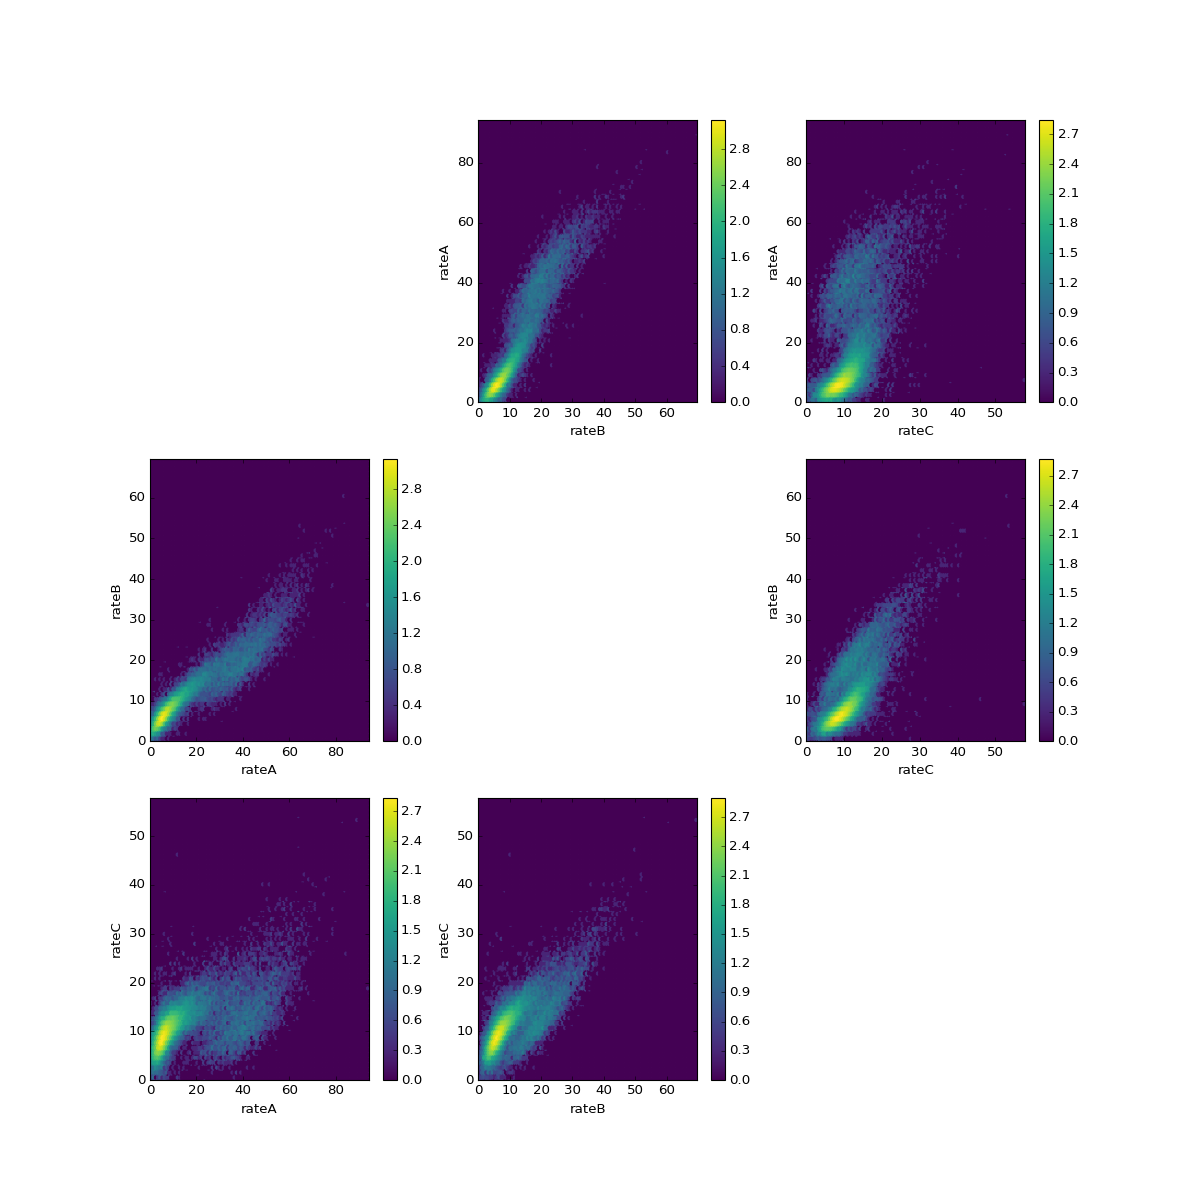

In [41]:
import matplotlib.pyplot as plt
fix, axes = plt.subplots(3, 3, figsize=(15, 15))

mask = (data.orbit < 0.25) | (data.orbit > 0.75)
cols= ['rateA', 'rateB', 'rateC', 'orbit']
for ax, col in zip(axes, cols):
    for axx, col2 in zip(ax, cols):
        if col == col2:
            axx.set_visible(False)
        else:
            data[mask].plot.hexbin(x=col2, y=col, gridsize=100, ax=axx, bins="log", cmap='viridis')

<IPython.core.display.Javascript object>


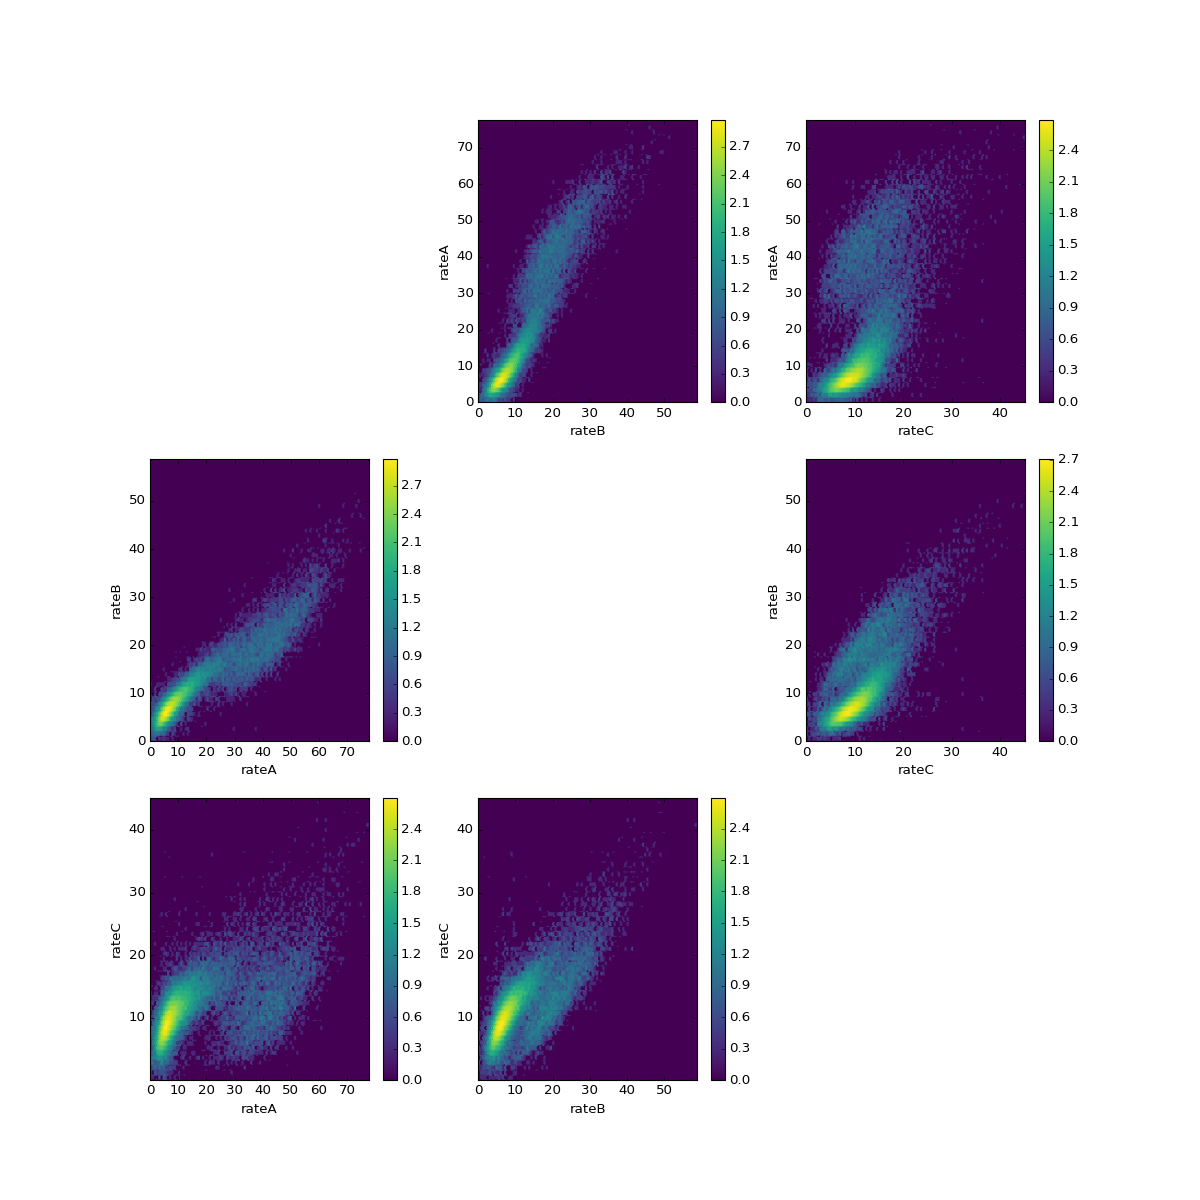

In [42]:
import matplotlib.pyplot as plt
fix, axes = plt.subplots(3, 3, figsize=(15, 15))

mask = (data.orbit > 0.25) & (data.orbit < 0.75)
cols= ['rateA', 'rateB', 'rateC', 'orbit']
for ax, col in zip(axes, cols):
    for axx, col2 in zip(ax, cols):
        if col == col2:
            axx.set_visible(False)
        else:
            data[mask].plot.hexbin(x=col2, y=col, gridsize=100, ax=axx, bins="log", cmap='viridis')

<IPython.core.display.Javascript object>


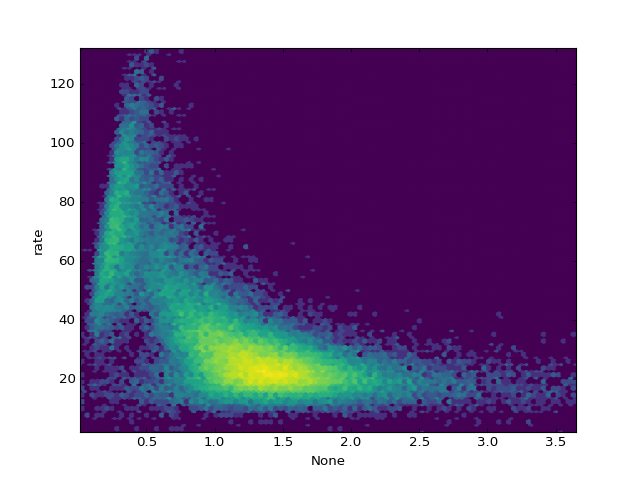

In [54]:
meh = (data.orbit > 0.25) & (data.orbit < 0.75)
bla = data[meh]
myhexplot(bla.rateC / bla.rateA, bla.rate, p1=99)

<IPython.core.display.Javascript object>


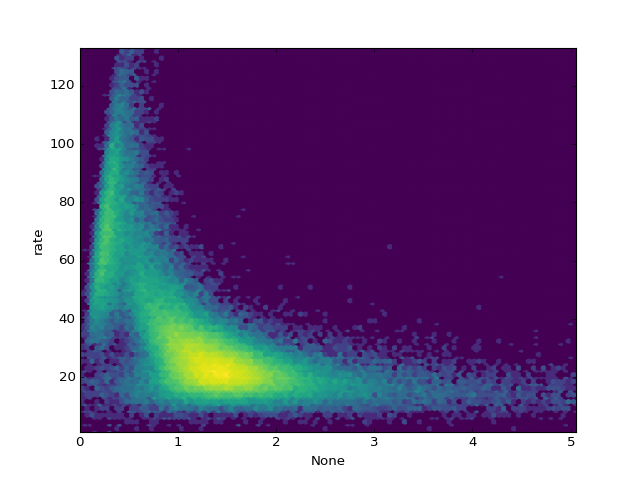

In [52]:
bla = data[~meh]
myhexplot(bla.rateC / bla.rateA, bla.rate, p1=99)